<a href="https://colab.research.google.com/github/deshwalmahesh/TRACER/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if not os.path.exists("./TRACER/"): 
  ! git clone https://github.com/deshwalmahesh/TRACER
  %cd ./TRACER
  !pip install -r requirements.txt

# restart the kernnel once after installing dependencies

if os.getcwd() != "/content/TRACER": 
   %cd ./TRACER

/content/TRACER


In [2]:
arch = 7 # Architecture you want to use. input from 0-7
with open ('./arch.txt', 'w') as f: f.write(str(arch))

from inference_demo_helper import *
from config import DummyArgs
from PIL import Image

## Note:
There are dependencies issues so you need to pass in the architecture from `0-7` from the input prompt. Use the same value below too.

In [3]:
args = DummyArgs(arch = arch)
inf_class = Inference(args)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/adv-efficientnet-b7-4652b6dd.pth" to /root/.cache/torch/hub/checkpoints/adv-efficientnet-b7-4652b6dd.pth


  0%|          | 0.00/255M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b7


Downloading: "https://github.com/Karel911/TRACER/releases/download/v1.0/TRACER-Efficient-7.pth" to /root/.cache/torch/hub/checkpoints/TRACER-Efficient-7.pth


  0%|          | 0.00/255M [00:00<?, ?B/s]

###### pre-trained Model restored #####


/content/TRACER/inference_demo_helper.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image.unsqueeze(0), device=self.device, dtype=torch.float32)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3455: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


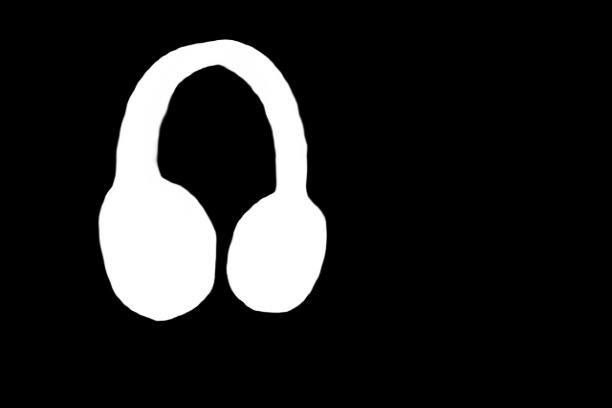

In [4]:
image = "https://media.istockphoto.com/photos/stylish-blue-headphones-on-multi-colored-duo-tone-background-lighting-picture-id1175355990?k=20&m=1175355990&s=612x612&w=0&h=LX5kcpZKWyJQA_Kh5Ub9EwDNpGtAimGr2AePNQJPYxE="
mask, img = inf_class.test(image) # You can pass any of the following: numpy array of RGB image, image URL, image, path or Pillow Image 
mask_image = Image.fromarray(mask)

mask_image

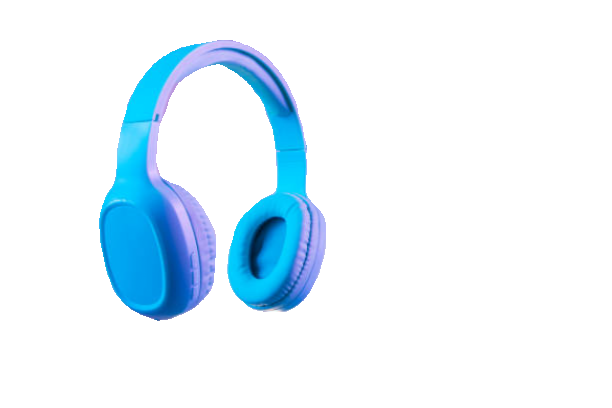

In [5]:
Image.fromarray(img) # Original Image with Background removed